In [10]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [7]:
def calc_ab(t, a0=1, phi_a=0, b0=1, phi_b=0):

    a_hat = a0 * np.exp(1j * phi_a)
    b_hat = b0 * np.exp(1j * phi_b)

    a = a_hat * np.exp(1j * t)
    b = b_hat * np.exp(1j * t)
    
    return np.real(a), np.real(b),  np.real(a)*np.real(b)

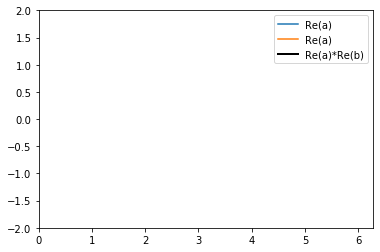

In [8]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2*np.pi))
ax.set_ylim((-2, 2))

line1, = ax.plot([], [], label='Re(a)')
line2, = ax.plot([], [], label='Re(a)')
line3, = ax.plot([], [], color='k', lw=2, label='Re(a)*Re(b)')
ax.legend()

In [9]:
def init():
    for line in [line1, line2, line3]:
        line.set_data([], [])
    return (line1, line2, line3)

def animate(i):
    t = np.linspace(0, 2*np.pi, 500)
    phase = 2 * np.pi * i / 100
    a, b, ab = calc_ab(t, phi_b=phase)
    line1.set_data(t, a)
    line2.set_data(t, b)
    line3.set_data(t, ab)
    return (line1, line2, line3)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, 
                               blit=True)

In [113]:
HTML(anim.to_html5_video())

<ipython-input-126-c35ab999fbe6>:44: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


1.0 1.5707963267948966


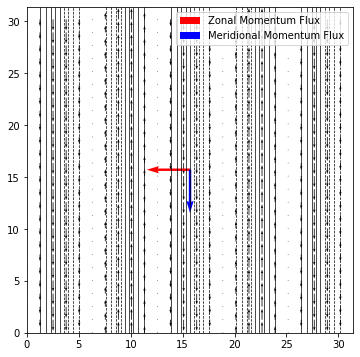

In [126]:
x = np.linspace(0, 10*np.pi, 1000)
y = np.linspace(0, 10*np.pi, 1000)

xx, yy = np.meshgrid(x, y)

k = 0.5
l = 0

t = 0
omega = 1

psi_hat = 1 + 0*1j

psi = psi_hat * np.exp(1j*(k*xx + l*yy - omega*t))


u = -1j * l * psi
v = 1j * k * psi


M = 0.5 * (k**2 - l**2)
N = - k*l
K = 0.5 * (k**2 + l**2)

gamma_m = np.sqrt(M**2 + N**2) / K
phi_m = 0.5 * np.arccos(-M / np.sqrt(M**2 + N**2))

E_x = -M, N
E_y = N, -M

plt.figure(figsize=(6, 6))
plt.contour(xx, yy, np.real(psi), colors='k', levels=10, linewidths=0.7,)
nd = 40
plt.quiver(xx[::nd, ::nd], yy[::nd, ::nd],
           np.real(u)[::nd, ::nd], np.real(v)[::nd, ::nd])


ones = np.ones_like(xx[::nd, ::nd])
plt.quiver(5  * np.pi, 5 * np.pi, E_x[0], E_x[1], color='red', label='Zonal Momentum Flux',
           angles='xy', scale_units='xy', scale=0.03)
plt.quiver(5  * np.pi, 5 * np.pi, E_y[0], E_y[1], color='blue', label='Meridional Momentum Flux',
           angles='xy', scale_units='xy', scale=0.03)

plt.axes().set_aspect('equal')
plt.legend()

print(gamma_m, phi_m)

<ipython-input-134-bf125b625325>:59: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


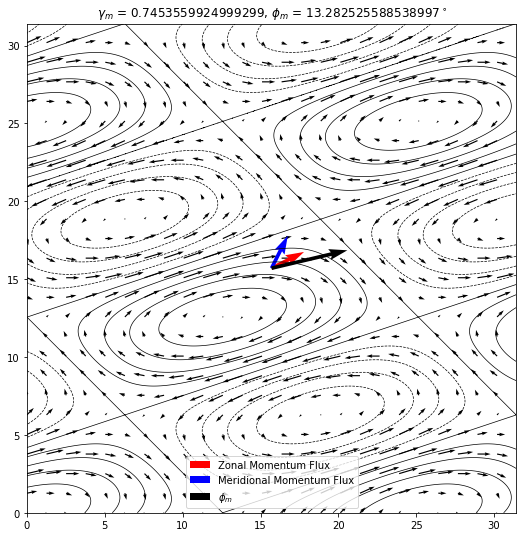

In [134]:
x = np.linspace(0, 10*np.pi, 1000)
y = np.linspace(0, 10*np.pi, 1000)

xx, yy = np.meshgrid(x, y)

k1 = 0
l1 = 0.5

k2 = 0.25
l2 = -0.25

t = 0
omega = 1

psi_hat_1 = 1 + 0*1j
psi_hat_2 = 1 + 0*1j

psi1_mag = psi

psi1 = psi_hat_1 * np.exp(1j*(k1*xx + l1*yy - omega*t))
psi2 = psi_hat_2 * np.exp(1j*(k2*xx + l2*yy - omega*t))
psi = psi1 + psi2

u = -1j * (l1 * psi1 + l2 * psi2)
v = 1j * (k1 * psi1 + k2 * psi2)

psi1_mag = .5 * abs(psi_hat_1)**2
psi2_mag = .5 * abs(psi_hat_2)**2


M = 0.5 * (k1**2 - l1**2) * psi1_mag + 0.5 * (k2**2 - l2**2) * psi2_mag
N = - (k1*l1*psi1_mag + k2*l2*psi2_mag)
K = 0.5 * (k1**2 + l1**2) * psi1_mag + 0.5 * (k2**2 + l2**2) * psi2_mag

gamma_m = np.sqrt(M**2 + N**2) / K
phi_m = 0.5 * np.arccos(-M / np.sqrt(M**2 + N**2))

E_x = -M, N
E_y = N, -M

plt.figure(figsize=(9, 9))
plt.contour(xx, yy, np.real(psi), colors='k', levels=10, linewidths=0.7,)
nd = 40
plt.quiver(xx[::nd, ::nd], yy[::nd, ::nd],
           np.real(u)[::nd, ::nd], np.real(v)[::nd, ::nd])

plt.quiver(5  * np.pi, 5 * np.pi, E_x[0], E_x[1], color='red', label='Zonal Momentum Flux',
           angles='xy', scale_units='xy', scale=0.03)
plt.quiver(5  * np.pi, 5 * np.pi, E_y[0], E_y[1], color='blue', label='Meridional Momentum Flux',
           angles='xy', scale_units='xy', scale=0.03)
plt.quiver(5  * np.pi, 5 * np.pi,
           np.cos(phi_m), np.sin(phi_m),
           color='k', label=r'$\phi_m$',
           angles='xy', scale_units='xy', scale=0.2)


plt.title(f"$\gamma_m$ = {gamma_m}, $\phi_m$ = {np.rad2deg(phi_m)}$^\circ$")

plt.axes().set_aspect('equal')
plt.legend()


<ipython-input-96-45d99f7d064d>:49: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


0.7453559924999299 0.23182380450040307


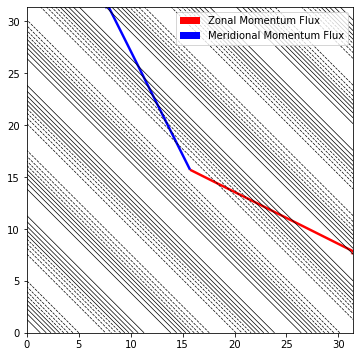

In [96]:
ones = np.ones_like(xx[::nd, ::nd])
plt.quiver(5  * np.pi, 5 * np.pi, E_x[0], E_x[1], color='red', label='Zonal Momentum Flux',
           angles='xy', scale_units='xy', scale=0.03)
plt.quiver(5  * np.pi, 5 * np.pi, E_y[0], E_y[1], color='blue', label='Meridional Momentum Flux',
           angles='xy', scale_units='xy', scale=0.03)

plt.axes().set_aspect('equal')
plt.legend()

print(gamma_m, phi_m)